# is_canceled - zmienna objaśniana

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

In [2]:
df = pd.read_csv("hotel_bookings.csv")

## Ręczna EDA

In [11]:
def helper(frame, col, axs = None, i = 0):
    frame2 = frame.groupby([col, 'is_canceled']).size().reset_index(name='counts')
    frame2['total'] = frame2.groupby(col)['counts'].transform('sum')

    frame2['proportion'] = frame2['counts'] / frame2['total']
    # frame2['proportion'] = frame2['counts'] / frame.shape[0]
    # frame2 = frame2[frame2['proportion'] > 0.045]
    # print(frame2)
    if axs is None:
        return sns.barplot(data = frame2, x = col, y = 'proportion', hue = 'is_canceled', errorbar=None, 
                           #order = pd.Series(frame['country']).value_counts().iloc[:15].index
                           )
    sns.barplot(data = frame2, x = col, y = 'proportion', hue = 'is_canceled', ax=axs[i//6, i%6], errorbar=None,
                #order = pd.value_counts(frame['country']).iloc[:15].index
                )
    
def plotter(frame, nrow = 6, ncol = 6):
    fig, axs = plt.subplots(6, 6, figsize = (16, 16), dpi = 600)
    i= 0
    for col in frame.columns:
        if frame.dtypes[col] != 'object':
            sns.boxplot(data = frame, y = col, x = 'is_canceled', ax=axs[i//6, i%6])
        else: 
            helper(frame, col, axs, i)
        i+=1

plt.show()

### Meta-wykres dla wszystkich zmiennych

In [36]:
plotter(df)

**Wnioski:** 
 - typ hotelu ma znaczenie
 - wyraźny wpływ leadtime

### Dokładniejsze spojrzenie na związek poszczególnych zmiennych z is_canceled

<Axes: xlabel='arrival_date_month', ylabel='proportion'>

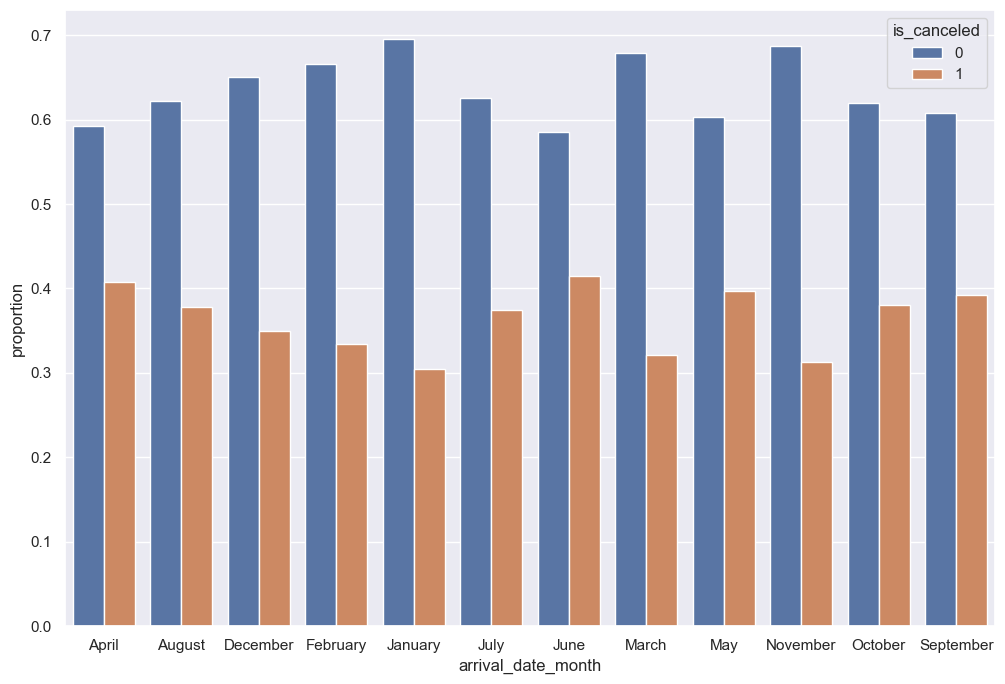

In [12]:
sns.set_theme(rc={'figure.figsize':(12, 8)})
helper(df, 'arrival_date_month')

(0.0, 5.0)

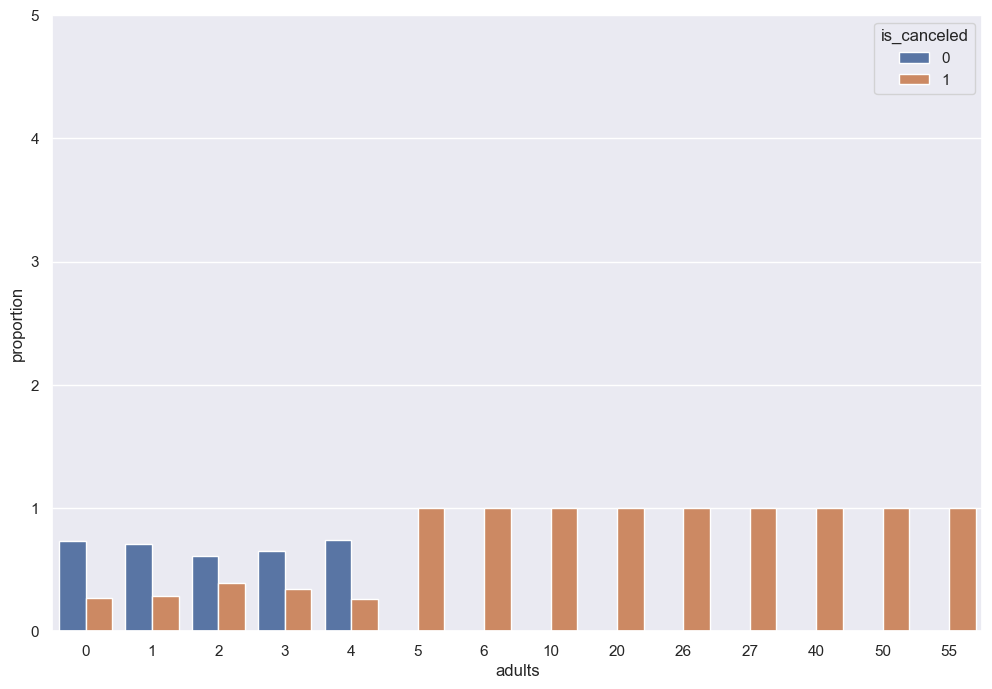

In [59]:
a = helper(df, 'adults')
a.set_ylim(0,5)

**Czy istotne?**

In [170]:
df[df['adults'] > 4].shape[0]/df.shape[0]

0.00013401457408493173

<Axes: xlabel='meal', ylabel='proportion'>

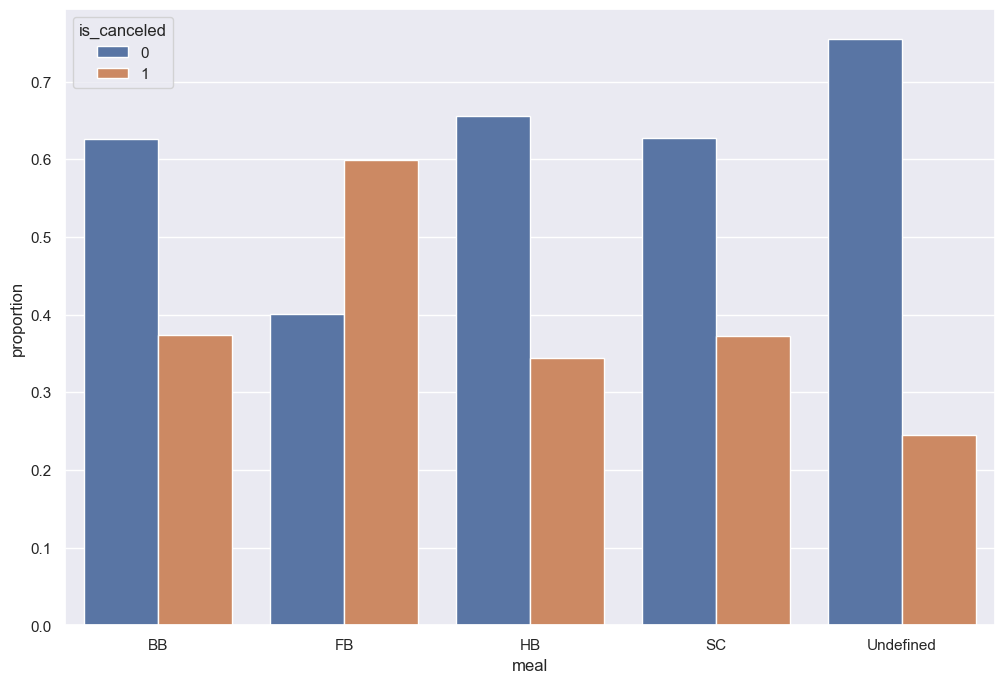

In [64]:
helper(df, 'meal')

In [171]:
df[df['meal'].isin(['FB','Undefined'])].shape[0]/df.shape[0]

0.016475416701566294

Nieistotne

<Axes: xlabel='country', ylabel='proportion'>

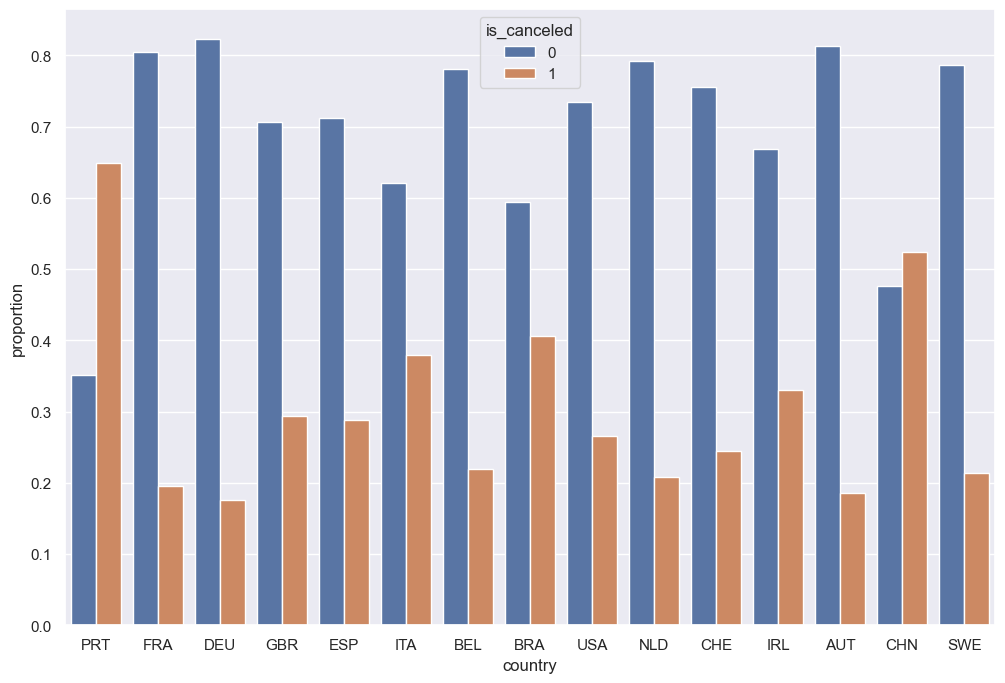

In [8]:
helper(df[df['hotel'] == 'City Hotel'], 'country')

<Axes: xlabel='country', ylabel='proportion'>

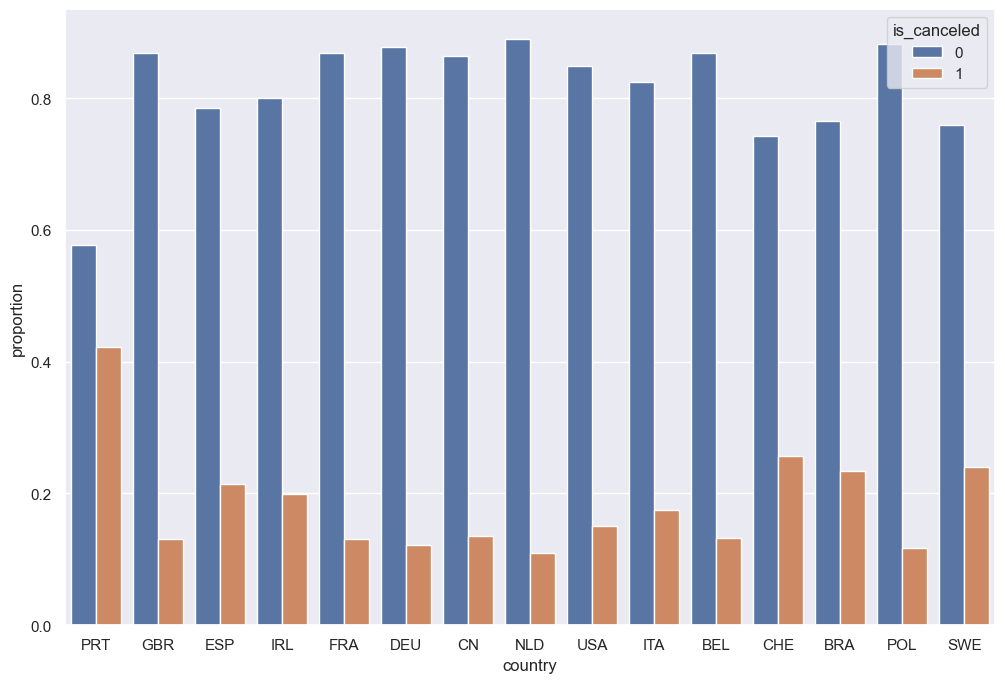

In [9]:
helper(df[df['hotel'] == 'Resort Hotel'], 'country')

<Axes: xlabel='market_segment', ylabel='proportion'>

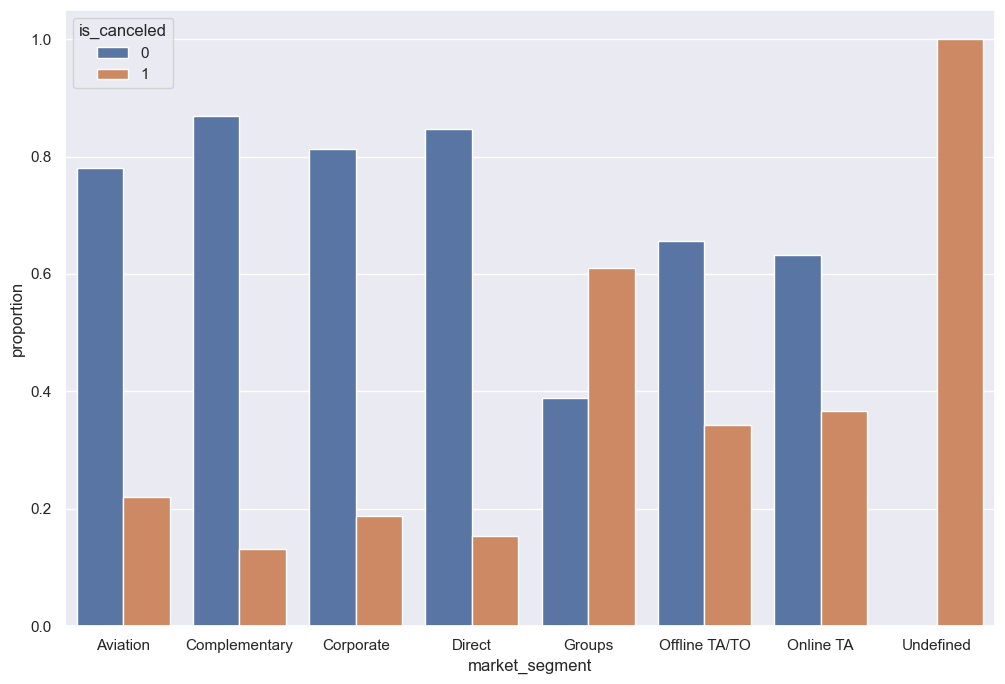

In [88]:
helper(df, 'market_segment')

In [172]:
df[df['market_segment'].isin(['Groups'])].shape[0]/df.shape[0]

0.16593517044978642

**Istotne**

<Axes: xlabel='distribution_channel', ylabel='proportion'>

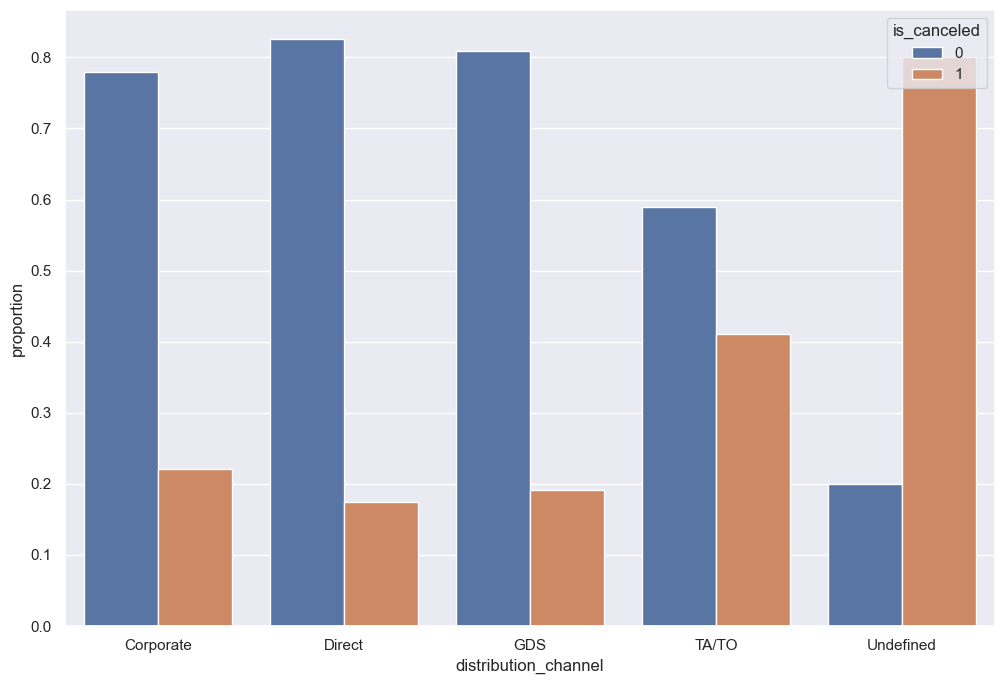

In [92]:
helper(df, 'distribution_channel')

In [173]:
df[df['distribution_channel'].isin(['TA/TO'])].shape[0]/df.shape[0]

0.8197503978557669

**Istotne**

<Axes: xlabel='is_repeated_guest', ylabel='proportion'>

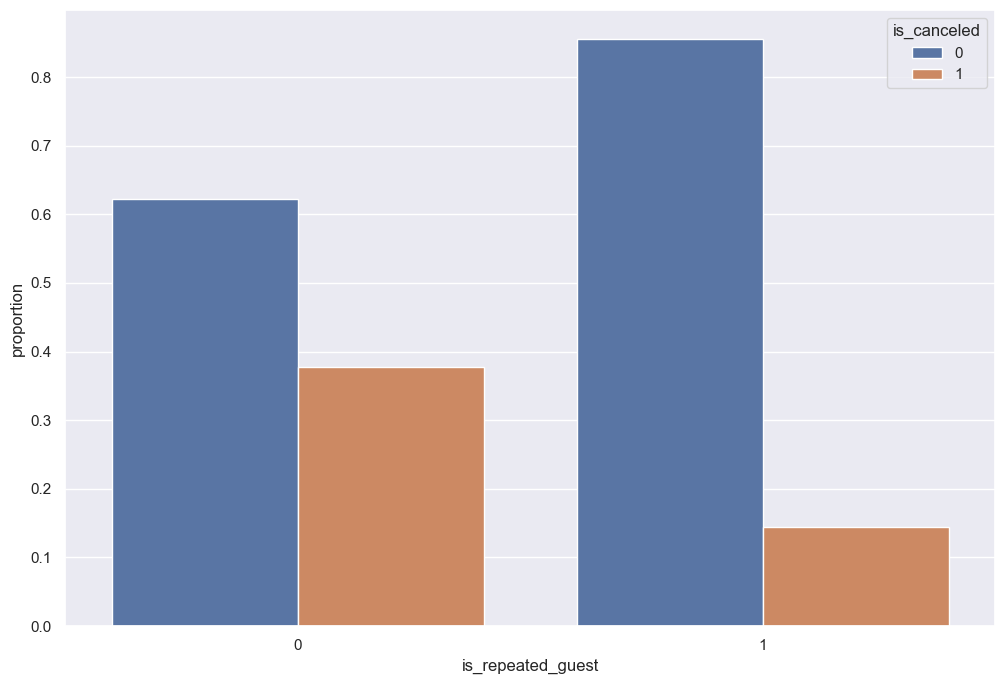

In [99]:
helper(df, 'is_repeated_guest')

**Bardzo wyraźne**

<Axes: xlabel='previous_cancellations', ylabel='proportion'>

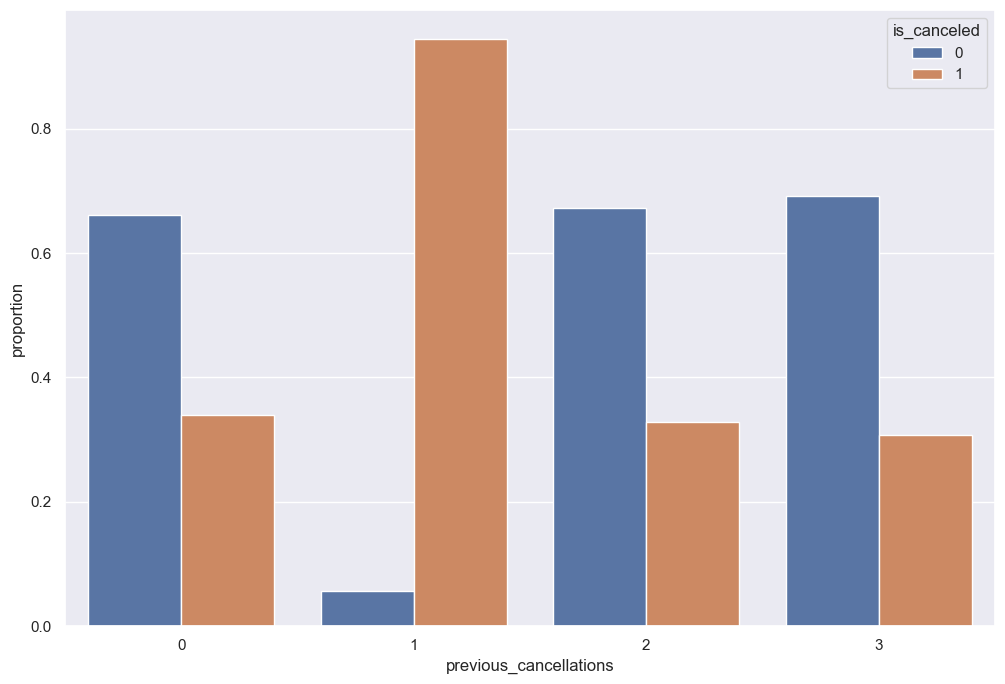

In [115]:
helper(df[df['previous_cancellations'] < 4], 'previous_cancellations')

In [174]:
df[df['previous_cancellations'] == 1].shape[0]/df.shape[0]

0.05068263673674512

**Do rozważenia**

0.9696792026132842

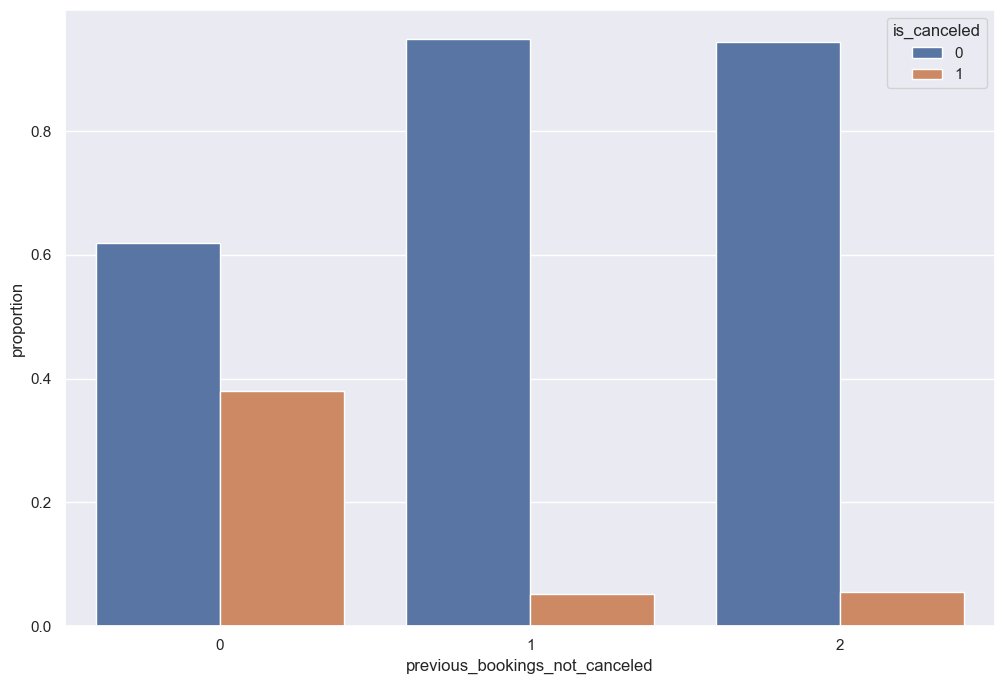

In [180]:
helper(df[df['previous_bookings_not_canceled'] < 3], 'previous_bookings_not_canceled')
df[df['previous_bookings_not_canceled'] < 1].shape[0]/df.shape[0]

**Do rozważenia**

0.6202613284194656

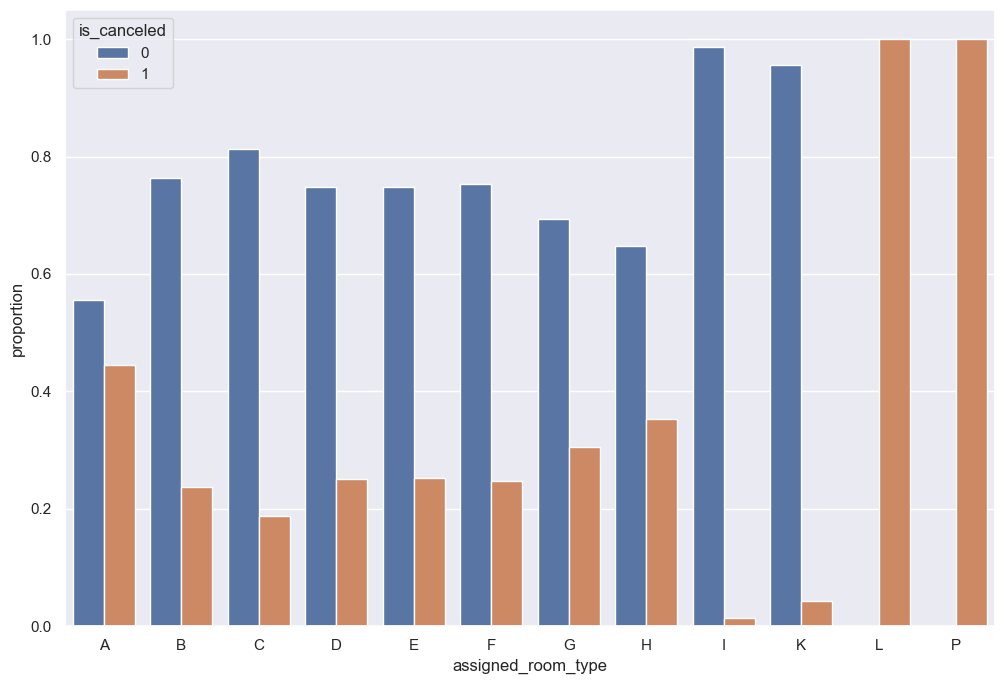

In [181]:
helper(df, 'assigned_room_type')
df[df['assigned_room_type'] == 'A'].shape[0]/df.shape[0]

**Istotne**

0.8485970349275483

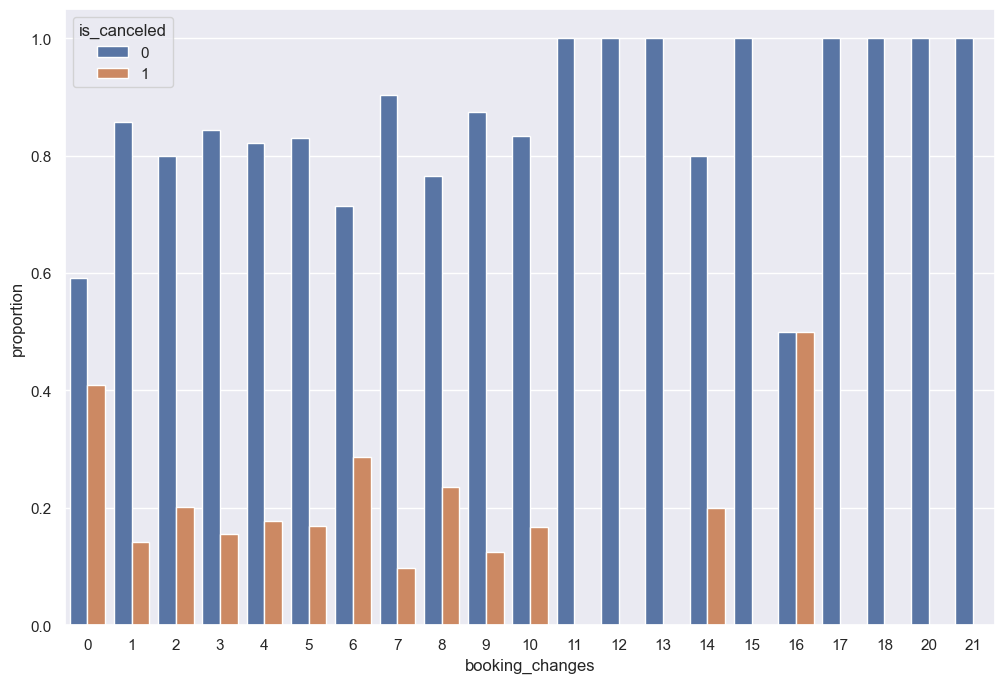

In [182]:
helper(df, 'booking_changes')
df[df['booking_changes'] == 0].shape[0]/df.shape[0]

**Do rozważenia**

0.1221794120110562

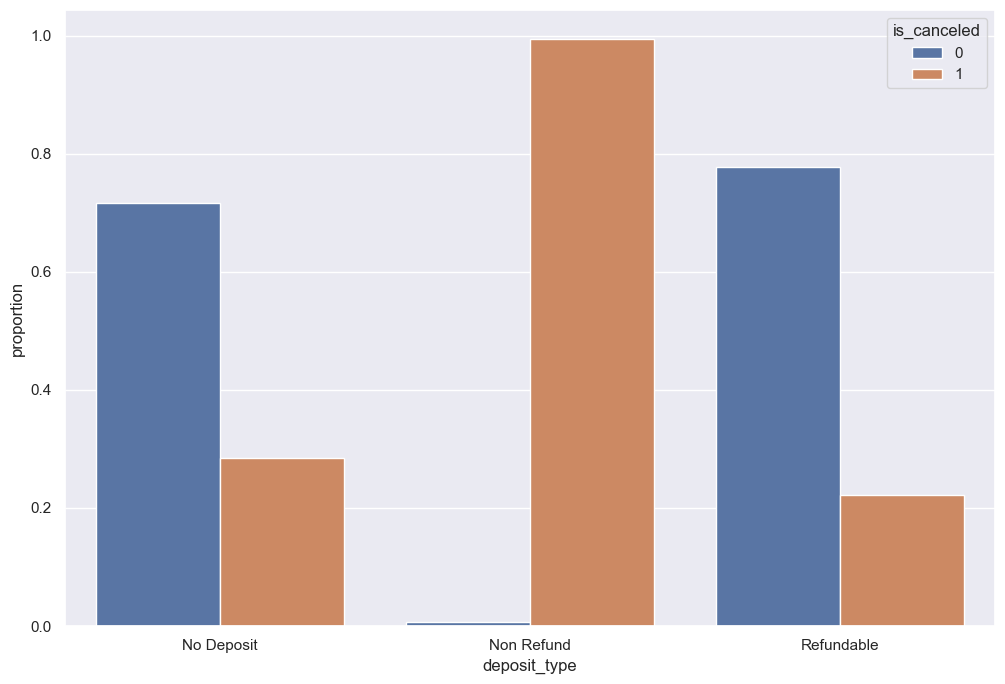

In [183]:
helper(df, 'deposit_type')
df[df['deposit_type'] == 'Non Refund'].shape[0]/df.shape[0]

**Pytanie o sens** - potencjalne zły opis zmiennej, który utrudnia wyciaganie logicznych o jej rozkładzie

     agent  is_canceled  counts  total  proportion
16     9.0            0   18697  31961    0.156604
17     9.0            1   13264  31961    0.111098
301  240.0            0    8438  13922    0.070676
302  240.0            1    5484  13922    0.045933


<Axes: xlabel='agent', ylabel='proportion'>

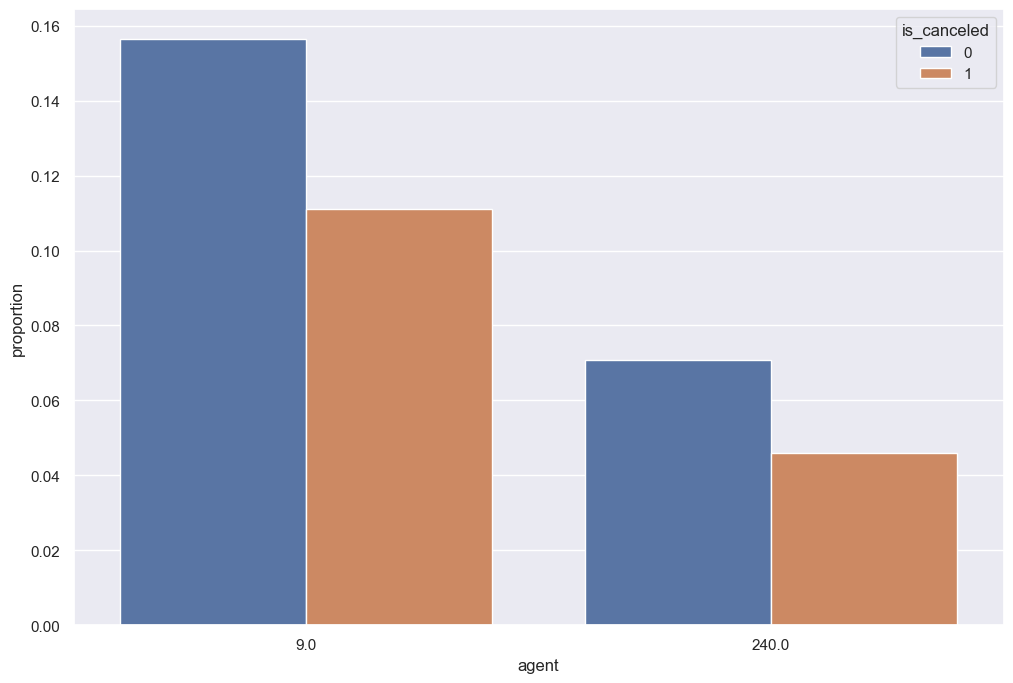

In [193]:
#temp = df.groupby('agent')
helper(df, 'agent')

**Raczej do pominięcia**

0.21043638495686406

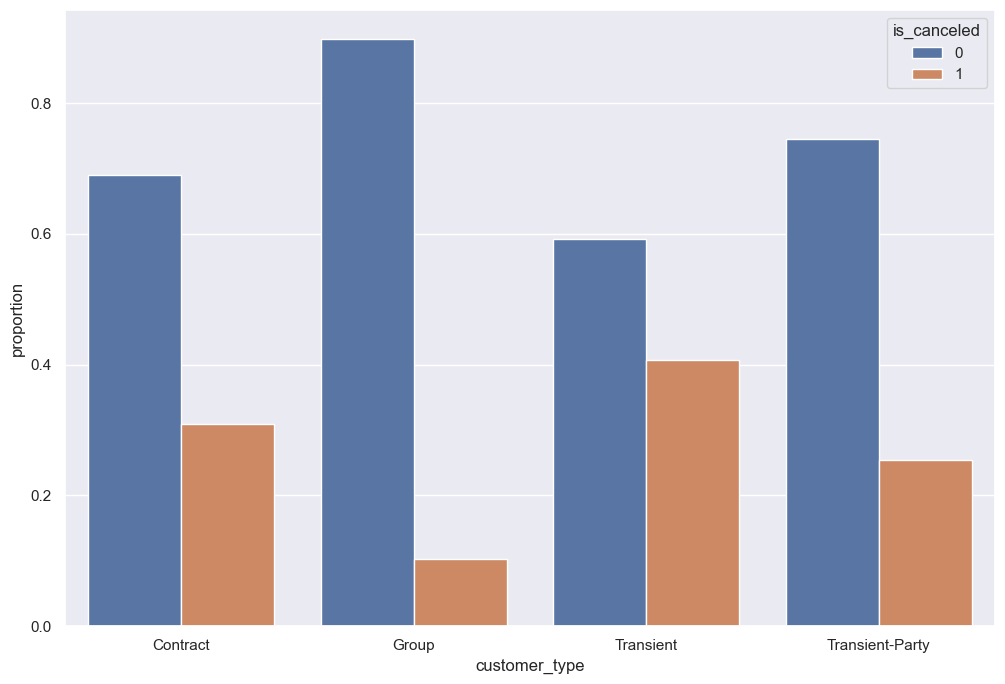

In [213]:
helper(df, 'customer_type')
df[df['customer_type'] == 'Transient-Party'].shape[0]/df.shape[0]

**Istotne**

In [219]:
# a = sns.boxplot(data = df[df['adr'] < 1000], x = 'is_canceled', y = 'adr')
# a.set_ylim(70, 110)

0.06183935002931569

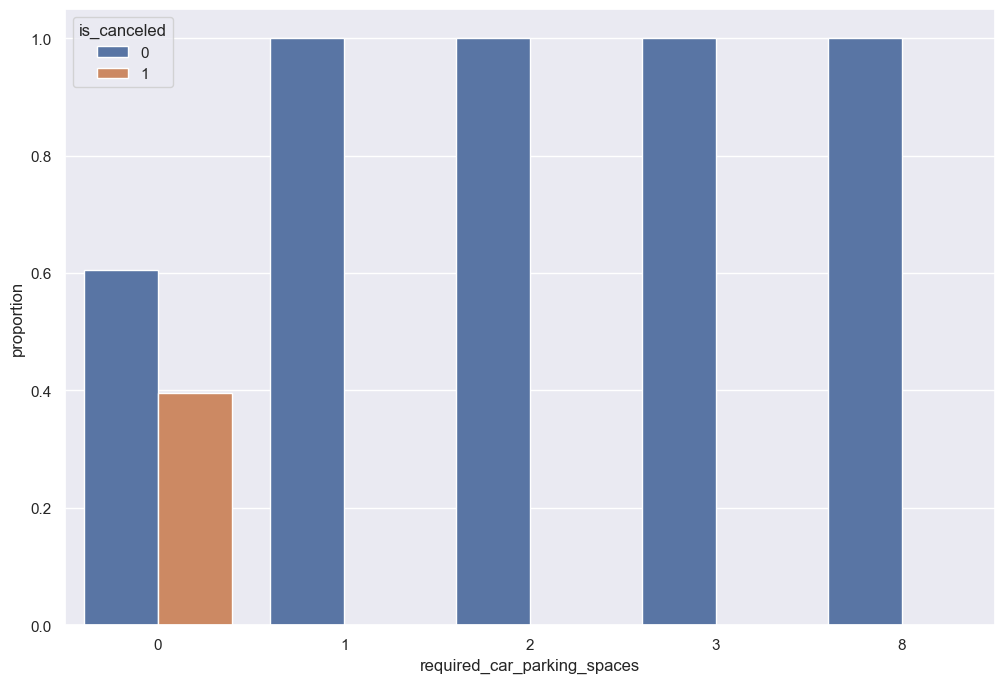

In [222]:
helper(df, 'required_car_parking_spaces' )
df[df['required_car_parking_spaces'] == 1].shape[0]/df.shape[0]

**Do rozważenia**

0.024097495602646787

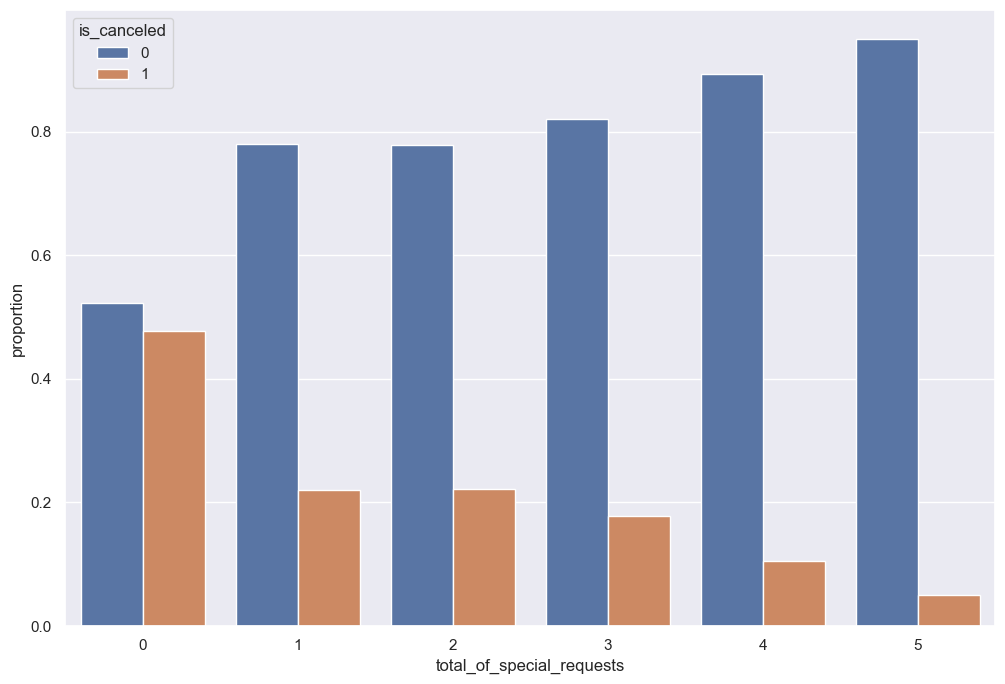

In [230]:
helper(df, 'total_of_special_requests')
df[df['total_of_special_requests'] > 2].shape[0]/df.shape[0]

**Istotne**

c:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='lead_time_std', ylabel='Count'>

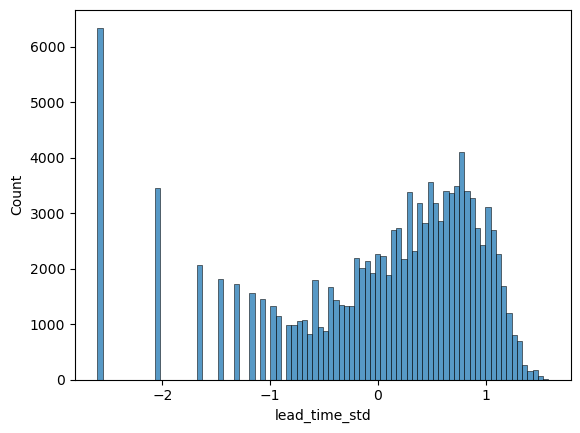

In [ ]:
df['lead_time_std'] = -1.0
df.loc[df['lead_time'] > 0, 'lead_time_std'] = np.log(df.lead_time[df.lead_time > 0])
#df['lead_time_scaled'] = (df['lead_time_std'] - np.min(df['lead_time_std']))/(np.max(df['lead_time_std']) - np.min(df['lead_time_std']))
df['lead_time_std'] = (df['lead_time_std'] - np.mean(df['lead_time_std']))/np.std(df['lead_time_std'])
sns.histplot(data=df, x='lead_time_std')

### Podsumowanie - przy przewidywaniu is_canceled
- *kluczowe*: lead_time, hotel, is_repeated_guest + może country
- *istotne*: arrival_date_month, market_segment i distribution_channel (wg autoEDA mocno skorelowane), assigned_room_type, customer_type, total_of_special_requests
- *do rozważenia*: previous_cancellations, previous_bookings_not_canceled, booking_changes, required_car_parking_spaces + może agent (14% braków)
- *pytania o sens*: deposit_type

## Auto EDA 

In [ ]:
profile = ProfileReport(df, title="Base autoEDA", explorative=True)
#profile.to_widgets()
profile.to_file("base_autoeda.html")

In [14]:
df_date = df
df_date['date'] = df.arrival_date_day_of_month.apply(str) + " " + df.arrival_date_month + " " + df.arrival_date_year.apply(str)
df_date['date'] = pd.to_datetime(df_date['date'])
df_date.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [17]:
# profile_test = ProfileReport(df_date, tsmode=True, sortby="date", title="Base autoEDA", explorative=True)
# profile_test.to_file("report1.html")

## Proste (i bardziej złożone) modele
- ich celem, zgodnie z otrzymana przez nas wskazówką, było pomóc w wyborze i przetwarzaniu istotnych zmiennych

In [3]:
from sklearnex import patch_sklearn
patch_sklearn()
#from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score,root_mean_squared_error, precision_score, recall_score

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [5]:
# sns.histplot(data=df, x= df.lead_time, log_scale=True)
# df.lead_time.unique().shape
len(df)-len(df.drop_duplicates())

31994

**Wybór kolumn na podstawie EDA** - dalej nazywane "wybranymi kolumnami"

In [4]:
df['lead_time_std'] = -1.0
df.loc[df['lead_time'] > 0, 'lead_time_std'] = np.log(df.lead_time[df.lead_time > 0])
df['lead_time_std'] = (df['lead_time_std'] - np.mean(df['lead_time_std']))/np.std(df['lead_time_std'])
df_t = df.drop_duplicates().loc[:, ['is_canceled', 'lead_time_std', 'hotel', 'is_repeated_guest', 'country', 'arrival_date_month', 'market_segment', 'distribution_channel',
                'assigned_room_type', 'customer_type', 'total_of_special_requests'] ]
df_t

is_canceled  lead_time_std         hotel  is_repeated_guest country  \
0                 0       1.159231  Resort Hotel                  0     PRT   
1                 0       1.581944  Resort Hotel                  0     PRT   
2                 0      -0.981870  Resort Hotel                  0     GBR   
3                 0      -0.641047  Resort Hotel                  0     GBR   
4                 0      -0.600246  Resort Hotel                  0     GBR   
...             ...            ...           ...                ...     ...   
119385            0      -0.326924    City Hotel                  0     BEL   
119386            0       0.493134    City Hotel                  0     FRA   
119387            0      -0.111726    City Hotel                  0     DEU   
119388            0       0.529678    City Hotel                  0     GBR   
119389            0       0.877451    City Hotel                  0     DEU   

       arrival_date_month market_segment distribution_channel  \
0                    July         Direct               Direct   
1                    July         Direct               Direct   
2                    July         Direct               Direct   
3                    July      Corporate            Corporate   
4                    July      Online TA                TA/TO   
...                   ...            ...                  ...   
119385             August  Offline TA/TO                TA/TO   
119386             August      Online TA                TA/TO   
119387             August      Online TA                TA/TO   
119388             August      Online TA                TA/TO   
119389             August      Online TA                TA/TO   

       assigned_room_type customer_type  total_of_special_requests  
0                       C     Transient                          0  
1                       C     Transient                          0  
2                       C     Transient                          0  
3                       A     Transient                          0  
4                       A     Transient                          1  
...                   ...           ...                        ...  
119385                  A     Transient                          0  
119386                  E     Transient                          2  
119387                  D     Transient                          4  
119388                  A     Transient                          0  
119389                  A     Transient                          2  

[87396 rows x 11 columns]

In [86]:
df_t.select_dtypes(include=['object']).columns.drop('country').to_list()

['hotel',
 'arrival_date_month',
 'market_segment',
 'distribution_channel',
 'assigned_room_type',
 'customer_type']

**One-hot encoding i podział danych na zbiory**
- zmienna objaśniana is_canceled, po m.in. usunięciu duplikatów z ramki, ma ok 72% zer i ok 28% jedynek

In [5]:
#df_t.country.unique().shape

#df_en = pd.get_dummies(df_t, columns= df_t.select_dtypes(include=['object']).columns.drop('distribution_channel').to_list(), drop_first=True, dtype='int')
#df_en.drop('distribution_channel', inplace=True, axis =1)
# le = LabelEncoder()
# df_en.country= le.fit_transform(df_en.country)
df_en = pd.get_dummies(df_t, columns= df_t.select_dtypes(include=['object']).columns.to_list(), drop_first=True, dtype='int')
df_en

is_canceled  lead_time_std  is_repeated_guest  \
0                 0       1.159231                  0   
1                 0       1.581944                  0   
2                 0      -0.981870                  0   
3                 0      -0.641047                  0   
4                 0      -0.600246                  0   
...             ...            ...                ...   
119385            0      -0.326924                  0   
119386            0       0.493134                  0   
119387            0      -0.111726                  0   
119388            0       0.529678                  0   
119389            0       0.877451                  0   

        total_of_special_requests  hotel_Resort Hotel  country_AGO  \
0                               0                   1            0   
1                               0                   1            0   
2                               0                   1            0   
3                               0                   1            0   
4                               1                   1            0   
...                           ...                 ...          ...   
119385                          0                   0            0   
119386                          2                   0            0   
119387                          4                   0            0   
119388                          0                   0            0   
119389                          2                   0            0   

        country_AIA  country_ALB  country_AND  country_ARE  ...  \
0                 0            0            0            0  ...   
1                 0            0            0            0  ...   
2                 0            0            0            0  ...   
3                 0            0            0            0  ...   
4                 0            0            0            0  ...   
...             ...          ...          ...          ...  ...   
119385            0            0            0            0  ...   
119386            0            0            0            0  ...   
119387            0            0            0            0  ...   
119388            0            0            0            0  ...   
119389            0            0            0            0  ...   

        assigned_room_type_F  assigned_room_type_G  assigned_room_type_H  \
0                          0                     0                     0   
1                          0                     0                     0   
2                          0                     0                     0   
3                          0                     0                     0   
4                          0                     0                     0   
...                      ...                   ...                   ...   
119385                     0                     0                     0   
119386                     0                     0                     0   
119387                     0                     0                     0   
119388                     0                     0                     0   
119389                     0                     0                     0   

        assigned_room_type_I  assigned_room_type_K  assigned_room_type_L  \
0                          0                     0                     0   
1                          0                     0                     0   
2                          0                     0                     0   
3                          0                     0                     0   
4                          0                     0                     0   
...                      ...                   ...                   ...   
119385                     0                     0                     0   
119386                     0                     0                     0   
119387                     0                     0                     0   
1193

In [5]:
def create_sets(df, with_tests = 0): 
    y = np.array(df.is_canceled)
    X = df.drop(['is_canceled'], axis=1)
    #X.is_canceled

    X_train, X_val, y_train, y_val = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=42
    ) 
    #stratify - podział zbioru y, żeby był zrównoważony
    X_train, X_test, y_train, y_test = train_test_split(
        X_train, y_train, stratify=y_train, test_size=0.25, random_state=42 # 0.25 * 0.8 = 0.2
    )
    #print(X_val)
    X_train_val=pd.concat((X_train,X_val))
    y_train_val=np.concatenate((y_train,y_val), axis=0)
    print(X_train.shape, X_val.shape, X_test.shape)
    if with_tests: return X_train, X_val, y_train, y_val, X_train_val, y_train_val, X_test, y_test
    return X_train, X_val, y_train, y_val, X_train_val, y_train_val

In [8]:
X_train, X_val, y_train, y_val, X_train_val, y_train_val = create_sets(df_en)

(52437, 216) (17480, 216) (17479, 216)


### Regresja liniowa - wynikająca z niezrozumienia tematu

In [129]:
def rmse_mae_r2(y_val, y_hat):
    mae = mean_absolute_error(y_true=y_val,y_pred=y_hat)
    rmse = root_mean_squared_error(y_true=y_val,y_pred=y_hat) 
    r2 = r2_score(y_true= y_val, y_pred= y_hat)  
    print("MAE:",mae)
    print("RMSE:",rmse)
    print("R2:", r2)

In [ ]:
lr = LinearRegression() 
lr.fit(X_train, y_train)
y_hat = lr.predict(X_val)

In [90]:
rmse_mae_r2(y_val, y_hat)

MAE: 0.3306204046069628
RMSE: 0.39830670182821837
R2: 0.204100890552519


In [148]:
print(lr.intercept_)
#lr.coef_

0.19432823646291336


### Regresja logistyczna

In [132]:
logr = LogisticRegression(max_iter=100000)
logr.fit(X_train, y_train)
y_hat2 = logr.predict(X_val)
#y_proba = logr.predict_proba(X_val)

In [133]:
rmse_mae_r2(y_val, y_hat2)
accuracy_score(y_val, y_hat2)

MAE: 0.21842105263157896
RMSE: 0.46735538151558603
R2: -0.09581184950751909


0.781578947368421

In [134]:
print(logr.intercept_)
print(np.sum(np.abs(logr.coef_) > 2))
#logr.coef_

[-0.46725808]
6


In [ ]:
#for str in ['accuracy', 'precision', 'recall']: 
scoring = ['accuracy', 'precision', 'recall'] # 72% - 28% w odwołaniach
temp = cross_validate(logr, X_train_val, y_train_val, scoring=scoring, cv = 3, n_jobs=-2)
temp
#print(str,'\nMin: ', np.min(temp),'\nMean:', np.mean(temp))

In [136]:
temp

{'fit_time': array([2.0148406 , 1.64805341, 1.90490389]),
 'score_time': array([0.0549643 , 0.05196881, 0.10194039]),
 'test_accuracy': array([0.78293143, 0.78147258, 0.78146321]),
 'test_precision': array([0.65458716, 0.65524575, 0.65060794]),
 'test_recall': array([0.44545029, 0.43280787, 0.44270996])}

In [ ]:
for str in ['accuracy', 'precision', 'recall']: # 72% - 28% w odwołaniach
    temp = cross_val_score(logr, X_train_val, y_train_val, scoring=str, cv = 3)
    print(str,'\nMin: ', np.min(temp),'\nMean:', np.mean(temp))

accuracy 
Min:  0.7695837548778726 
Mean: 0.7702165662902152
precision 
Min:  0.6341463414634146 
Mean: 0.6357910138462616
recall 
Min:  0.3743427970557308 
Mean: 0.3842884682790046


In [34]:
#print('Min: ', np.min([1,2]),'\nMean:', np.mean([1,2]))
# scaling=StandardScaler()

# scaling.fit(df_num)
# df_sc=scaling.transform(df_num)

# principal=PCA(n_components=2)
# principal.fit(df_sc)
# x=principal.transform(df_sc)
 
# # Check the dimensions of data after PCA
# print(x.shape)


### Dla wszystkich kolumn - sprawdzenie działania modeli na nieprzetworzonych zmiennych
- Usunięcie jedynie kolumn będących bardzo skorelowanymi z is_canceled lub mającymi dużo braków
- One-hot encoding

In [6]:
df_temp = df.drop_duplicates().drop(['agent', 'company', 'reservation_status', 'lead_time'], axis = 1).dropna()
df_all_en = pd.get_dummies(df_temp, columns= df_temp.select_dtypes(include=['object']).columns.to_list(), drop_first=True, dtype='int')
df_all_en

is_canceled  arrival_date_year  arrival_date_week_number  \
0                 0               2015                        27   
1                 0               2015                        27   
2                 0               2015                        27   
3                 0               2015                        27   
4                 0               2015                        27   
...             ...                ...                       ...   
119385            0               2017                        35   
119386            0               2017                        35   
119387            0               2017                        35   
119388            0               2017                        35   
119389            0               2017                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies  is_repeated_guest  \
0                          0       2       0.0       0                  0   
1                          0       2       0.0       0                  0   
2                          1       1       0.0       0                  0   
3                          1       1       0.0       0                  0   
4                          2       2       0.0       0                  0   
...                      ...     ...       ...     ...                ...   
119385                     5       2       0.0       0                  0   
119386                     5       3       0.0       0                  0   
119387                     5       2       0.0       0                  0   
119388                     5       2       0.0       0                  0   
119389                     7       2       0.0       0                  0   

        ...  reservation_status_date_2017-09-03  \
0       ...                                   0   
1       ...                                   0   
2       ...                                   0   
3       ...                                   0   
4       ...                                   0   
...     ...                                 ...   
119385  ...                                   0   
119386  ...                                   0   
119387  ...                                   0   
119388  ...                                   0   
119389  ...                                   0   

        reservation_status_date_2017-09-04  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   
...                                    ...   
119385                                   0   
119386                                   0   
119387                                   0   
119388                                   0   
119389                                   0   

        reservation_status_date_2017-09-05  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   
...                                    ...   
119385                           

In [51]:
#df_all_en[df_all_en.isna().any(axis=1)]

In [ ]:
X_train, X_val, y_train, y_val, X_train_val, y_train_val = create_sets(df_all_en)
logr_all = LogisticRegression(max_iter=100000, C=5, solver='newton-cholesky')
logr_all.fit(X_train, y_train)
y_hat_all = logr_all.predict(X_val)

(52164, 1169) (17388, 1169) (17388, 1169)


In [41]:
accuracy_score(y_val, y_hat_all)

0.8205083965953531

In [ ]:
# for str in ['accuracy', 'precision', 'recall']:
#     temp = cross_val_score(logr_all, X_train_val, y_train_val, scoring=str, cv = 3)
#     print(str,'\nMin: ', np.min(temp),'\nMean:', np.mean(temp))
scoring = ['accuracy', 'precision', 'recall'] # 'f1', 'roc_auc']
temp = cross_validate(logr_all, X_train_val, y_train_val, scoring=scoring, cv = 3, verbose = 3)
temp

In [ ]:
temp # z reservation_status_date

{'fit_time': array([41.99730778, 25.47351599, 40.40971637]),
 'score_time': array([0.24793625, 0.18395376, 0.26393652]),
 'test_accuracy': array([0.86878882, 0.87262767, 0.86667529]),
 'test_precision': array([0.84491979, 0.84672709, 0.83206107]),
 'test_recall': array([0.64227642, 0.6572858 , 0.64749101])}

In [46]:
np.array_equal(y_val, y_hat_all)

False

In [75]:
print(np.sum(np.abs(logr_all.coef_) > 2.5))
logr_all.coef_.shape #drzewa , w logit parametr C

5


(1, 1169)

In [63]:
#(np.abs(logr_all.coef_) > 3)[0]
X_train_val.iloc[:, np.asarray(np.abs(logr_all.coef_) > 3).nonzero()[1]]

required_car_parking_spaces  assigned_room_type_G  \
112270                            0                     0   
7039                              0                     0   
86057                             0                     0   
31537                             0                     0   
67102                             0                     0   
...                             ...                   ...   
99948                             0                     0   
12084                             0                     0   
4322                              0                     0   
21981                             0                     0   
20943                             0                     0   

        assigned_room_type_I  deposit_type_Non Refund  
112270                     0                        0  
7039                       0                        0  
86057                      0                        0  
31537                      0                        0  
67102                      0                        0  
...                      ...                      ...  
99948                      0                        0  
12084                      0                        0  
4322                       0                        0  
21981                      0                        0  
20943                      0                        0  

[69552 rows x 4 columns]

**(Nieudana) próba znalezienia istotnych zmiennych** - na bazie wielkości współczynników z regresji logistycznej

In [10]:
def column_chooser(df_out, threshold, max_iter=1000, cv = 3):
    X_train, X_val, y_train, y_val, X_train_val, y_train_val = create_sets(df_all_en.iloc[:, np.append([0], np.asarray(np.abs(logr_all.coef_) > threshold).nonzero()[1])])
    l = LogisticRegression(max_iter=max_iter)
    #l.fit(X_train, y_train)
    #y_hat_all = l.predict(X_val)
    # for str in ['accuracy', 'precision', 'recall']:
    #     temp = cross_val_score(l, X_train_val, y_train_val, scoring=str, cv = cv)
    #     df_out = pd.DataFrame([[threshold, str, np.mean(temp)]], columns=df_out.columns) if df_out.empty else pd.concat(
    #         [pd.DataFrame([[threshold, str, np.mean(temp)]], columns=df_out.columns), df_out], ignore_index=True)
    #     #print(str,'\nMin: ', np.min(temp),'\nMean:', np.mean(temp))

    scoring = ['accuracy', 'precision', 'recall']
    temp = cross_validate(l, X_train_val, y_train_val, scoring=scoring, cv = cv)
    new_rows = pd.DataFrame({'threshold': [threshold, threshold, threshold], 'method' : ['accuracy', 'precision', 'recall'],
                            'val' : [np.mean(temp.get('test_accuracy')), np.mean(temp.get('test_precision')), np.mean(temp.get('test_recall'))] })
    df_out = new_rows if df_out.empty else pd.concat([new_rows, df_out], ignore_index=True)
    return df_out

In [ ]:
# d = dict(a =np.array([827.67268658, 913.39293814, 861.18507314]), b = np.array([0.28383708, 0.78057027, 0.31991935]))
# x = np.mean(d.get('a'))
# x

In [ ]:
results = pd.DataFrame(columns=['threshold', 'method', 'val'])
a = 0.1
b = 0.5
threshold_arr = np.linspace(a, b, int((b-a)/0.05)+1)
for el in threshold_arr:
    results = column_chooser(results, el) # 70 min

In [12]:
results = pd.read_csv("column_chooser.csv", sep='\t')
results
# res2 = results
# res2

Unnamed: 0.2  Unnamed: 0  threshold     method       val  Unnamed: 0.1
0               0         0.0       0.10     recall  0.564907           NaN
1               1         1.0       0.10  precision  0.730988           NaN
2               2         2.0       0.10   accuracy  0.822593           NaN
3               3         3.0       0.05     recall  0.572463           NaN
4               4         4.0       0.05  precision  0.733478           NaN
..            ...         ...        ...        ...       ...           ...
151           151         NaN       0.15  precision  0.694804         145.0
152           152         NaN       0.15     recall  0.402574         146.0
153           153         NaN       0.10   accuracy  0.797792         147.0
154           154         NaN       0.10  precision  0.718646         148.0
155           155         NaN       0.10     recall  0.439210         149.0

[156 rows x 6 columns]

In [ ]:
#results.to_csv('column_chooser.csv', sep='\t')
res2 = pd.read_csv("column_chooser2.csv", sep='\t')
# merged_res = pd.concat([res2, results], ignore_index=True)
# merged_res.to_csv('column_chooser.csv', sep='\t')

In [115]:
x = df_all_en.iloc[:, np.append([0], np.asarray(np.abs(logr_all.coef_) > 1).nonzero()[1])].loc[:, 'is_canceled']
np.sum(x==0)/ x.shape[0]

np.float64(0.7240970784449046)

## Bardziej rozbudowane modele - Drzewo decyzyjne, SVM, Naive Bayes, AdaBoost, XGBoost

### Drzewo

In [24]:
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from hyperopt import fmin, tpe, hp, STATUS_OK
from hyperopt.pyll.base import scope

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


**Dla wybranych kolumn**

In [71]:
X_train, X_val, y_train, y_val, X_train_val, y_train_val = create_sets(df_en)
tree1 = DecisionTreeClassifier()
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
temp = cross_validate(tree1, X_train_val, y_train_val, scoring=scoring, cv = 10)
temp

(52437, 216) (17480, 216) (17479, 216)


{'fit_time': array([2.6593225 , 2.21547437, 2.10346484, 1.67157292, 1.69158316,
        1.8234973 , 1.81791377, 2.4993639 , 2.52331877, 1.86752963]),
 'score_time': array([0.07997727, 0.0479672 , 0.05998635, 0.05596495, 0.04399109,
        0.04799175, 0.08398104, 0.0799799 , 0.060004  , 0.03998995]),
 'test_accuracy': array([0.75986842, 0.75400458, 0.76144165, 0.75772311, 0.75343249,
        0.76058352, 0.75371854, 0.75582892, 0.76112144, 0.7522529 ]),
 'test_precision': array([0.5640485 , 0.55453564, 0.56813305, 0.56089744, 0.55205047,
        0.56919643, 0.55364807, 0.55826558, 0.56892779, 0.55277778]),
 'test_recall': array([0.55671176, 0.53433923, 0.55098855, 0.54630593, 0.54630593,
        0.53069719, 0.53694069, 0.5359001 , 0.54110302, 0.51768991]),
 'test_f1': array([0.56035611, 0.54425013, 0.55942948, 0.55350554, 0.54916318,
        0.54927302, 0.5451664 , 0.54685426, 0.55466667, 0.53465879]),
 'test_roc_auc': array([0.70699633, 0.69634159, 0.70610347, 0.69810643, 0.70013074,
 

**Dla wszystkich kolumn**

In [ ]:
X_train, X_val, y_train, y_val, X_train_val, y_train_val = create_sets(df_all_en)
tree2 = DecisionTreeClassifier()
# tree1.fit(X_train,y_train)
# y_hat_tree = tree1.predict(X_val)
# tree1.get_params()

(52164, 1169) (17388, 1169) (17388, 1169)


In [ ]:
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
temp = cross_validate(tree2, X_train_val, y_train_val, scoring=scoring, cv = 10)
temp

{'fit_time': array([28.66470504, 18.99517083, 15.73199677, 26.6852057 , 16.17989779,
        13.89244652, 15.12815118, 14.00043678, 14.82022595, 14.40833068]),
 'score_time': array([0.25595951, 0.24393201, 0.66383576, 0.25593591, 0.17195678,
        0.14796567, 0.14796495, 0.15596223, 0.17597151, 0.16397429]),
 'test_accuracy': array([0.82834963, 0.82518689, 0.82242991, 0.82918763, 0.8340762 ,
        0.83594536, 0.83235083, 0.82890007, 0.82861251, 0.81365924]),
 'test_precision': array([0.69374666, 0.69302581, 0.67945349, 0.69853341, 0.70443613,
        0.70735608, 0.70450842, 0.69842134, 0.6985254 , 0.67143643]),
 'test_recall': array([0.67639396, 0.65763418, 0.67413973, 0.6701407 , 0.68681605,
        0.69150599, 0.67587285, 0.66857738, 0.66649297, 0.63574779]),
 'test_f1': array([0.68496042, 0.67486631, 0.67678618, 0.68404255, 0.69551451,
        0.69934124, 0.68989362, 0.68317359, 0.68213333, 0.65310493]),
 'test_roc_auc': array([0.78131788, 0.77332771, 0.77651795, 0.77996709, 0.7

### SVM

**Dla wybranych kolumn**

In [69]:
svm = SVC()
# svm.fit(X_train,y_train)
# y_hat_svm = svm.predict(X_val)

In [ ]:
X_train, X_val, y_train, y_val, X_train_val, y_train_val = create_sets(df_en)
#X_train, X_val, y_train, y_val, X_train_val, y_train_val = create_sets(df_all_en)
scoring = ['accuracy', 'precision', 'recall']
temp = cross_validate(svm, X_train_val, y_train_val, scoring=scoring, cv = 3) # 42 min
temp

(52437, 216) (17480, 216) (17479, 216)


{'fit_time': array([492.92416239, 477.60647631, 540.34262156]),
 'score_time': array([307.88575149, 336.64523125, 366.50591111]),
 'test_accuracy': array([0.72556423, 0.72500644, 0.72525209]),
 'test_precision': array([0.92307692, 0.4375    , 0.63636364]),
 'test_recall': array([0.00187295, 0.00109256, 0.00109273])}

**Dla wszystkich kolumn**

In [ ]:
X_train, X_val, y_train, y_val, X_train_val, y_train_val = create_sets(df_all_en)
scoring = ['accuracy', 'precision', 'recall']
temp = cross_validate(svm, X_train_val, y_train_val, scoring=scoring, cv = 2)
temp

### Naive Bayes

**Dla wybranych kolumn**

In [48]:
nb = GaussianNB()
# nb.fit(X_train,y_train)
# y_hat = nb.predict(X_val)

In [49]:
X_train, X_val, y_train, y_val, X_train_val, y_train_val = create_sets(df_en)
scoring = ['accuracy', 'precision', 'recall']
temp = cross_validate(nb, X_train_val, y_train_val, scoring=scoring, cv = 3, n_jobs=-2)
temp

(52437, 216) (17480, 216) (17479, 216)


{'fit_time': array([0.54067206, 0.53767753, 0.50969362]),
 'score_time': array([0.26884413, 0.27483726, 0.26484466]),
 'test_accuracy': array([0.29880717, 0.29885008, 0.29851963]),
 'test_precision': array([0.28001417, 0.28002657, 0.27971284]),
 'test_recall': array([0.98688934, 0.98688934, 0.98532626])}

**Dla wszystkich kolumn**

In [50]:
X_train, X_val, y_train, y_val, X_train_val, y_train_val = create_sets(df_all_en)
scoring = ['accuracy', 'precision', 'recall']
temp = cross_validate(nb, X_train_val, y_train_val, scoring=scoring, cv = 2, n_jobs=-2)
temp

(52164, 1169) (17388, 1169) (17388, 1169)


{'fit_time': array([2.43558288, 2.43258429]),
 'score_time': array([1.79196715, 1.76398492]),
 'test_accuracy': array([0.67954911, 0.65927651]),
 'test_precision': array([0.43339636, 0.41800058]),
 'test_recall': array([0.52564103, 0.59874935])}

### AdaBoost

**Dla wybranych kolumn**

In [ ]:
X_train, X_val, y_train, y_val, X_train_val, y_train_val = create_sets(df_en)
ada = AdaBoostClassifier(n_estimators=1000)
scoring = ['accuracy', 'precision', 'recall']
scores = cross_validate(ada, X_train_val, y_train_val, scoring=scoring, cv = 3, n_jobs=-2)
scores

(52437, 216) (17480, 216) (17479, 216)


{'fit_time': array([131.51552773, 126.82819676, 135.01636767]),
 'score_time': array([19.04304385, 17.89370108, 18.79518437]),
 'test_accuracy': array([0.77709603, 0.77838325, 0.77639991]),
 'test_precision': array([0.64319471, 0.65058196, 0.64491875]),
 'test_recall': array([0.42484782, 0.41876073, 0.41507961])}

**Dla wszystkich kolumn**

In [ ]:
X_train, X_val, y_train, y_val, X_train_val, y_train_val = create_sets(df_all_en)
ada = AdaBoostClassifier(n_estimators=10000)
scoring = ['accuracy', 'precision', 'recall']
scores = cross_validate(ada, X_train_val, y_train_val, scoring=scoring, cv = 3, verbose=2)
scores # bez reservation_status_date

{'fit_time': array([1486.5829227 , 1506.43515015, 1469.93948793]),
 'score_time': array([205.60724545, 186.38887167, 163.90067744]),
 'test_accuracy': array([0.78165977, 0.78821601, 0.78575742]),
 'test_precision': array([0.66157946, 0.68192948, 0.6683145 ]),
 'test_recall': array([0.42698562, 0.43542839, 0.44380178])}

### XGBoost

**Dla wybranych kolumn**

In [ ]:
X_train, X_val, y_train, y_val, X_train_val, y_train_val= create_sets(df_en)
clf = xgb.XGBClassifier(tree_method="exact", early_stopping_rounds=100, learning_rate = 0.10780119865397095, n_estimators = 777, max_depth = 7)
clf.fit(X_train, y_train, eval_set=[(X_val, y_val)])
y_hat = clf.predict(X_val)

(52437, 216) (17480, 216) (17479, 216)
[0]	validation_0-logloss:0.56132
[1]	validation_0-logloss:0.53952
[2]	validation_0-logloss:0.52204
[3]	validation_0-logloss:0.50782
[4]	validation_0-logloss:0.49601
[5]	validation_0-logloss:0.48627
[6]	validation_0-logloss:0.47792
[7]	validation_0-logloss:0.47083
[8]	validation_0-logloss:0.46487
[9]	validation_0-logloss:0.45982
[10]	validation_0-logloss:0.45521
[11]	validation_0-logloss:0.45155
[12]	validation_0-logloss:0.44844
[13]	validation_0-logloss:0.44543
[14]	validation_0-logloss:0.44287
[15]	validation_0-logloss:0.44076
[16]	validation_0-logloss:0.43878
[17]	validation_0-logloss:0.43702
[18]	validation_0-logloss:0.43548
[19]	validation_0-logloss:0.43434
[20]	validation_0-logloss:0.43288
[21]	validation_0-logloss:0.43184
[22]	validation_0-logloss:0.43112
[23]	validation_0-logloss:0.43018
[24]	validation_0-logloss:0.42922
[25]	validation_0-logloss:0.42837
[26]	validation_0-logloss:0.42784
[27]	validation_0-logloss:0.42725
[28]	validation_0-l

In [33]:
print(accuracy_score(y_val, y_hat), precision_score(y_val, y_hat), recall_score(y_val, y_hat))
param_grid = {
    'learning_rate': np.linspace(0.01, 0.5, 10),
    'max_depth': np.linspace(3, 13, 10)//1,
    'n_estimators': np.linspace(100, 1000, 10)//1
}

0.8005720823798627 0.6649987490617963 0.5531737773152966


**Pierwsze próby strojenia hiperparametrów** - tu przy użyciu polecanego hyperopt

In [31]:
space = {
    'max_depth': scope.int(hp.quniform('max_depth', 2, 8, 1)),
    'learning_rate': hp.loguniform('learning_rate', -5, -2),
    'n_estimators': scope.int(hp.quniform('n_estimators', 10, 1000, 1))
}
def objective(params):
    xgb_model = xgb.XGBClassifier(**params)
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    return {'loss': -score, 'status': STATUS_OK}

best_params = fmin(objective, space, algo=tpe.suggest, max_evals=100)
print("Best set of hyperparameters: ", best_params)

100%|██████████| 100/100 [21:41<00:00, 13.02s/trial, best loss: -0.802974828375286]
Best set of hyperparameters:  {'learning_rate': np.float64(0.10780119865397095), 'max_depth': np.float64(7.0), 'n_estimators': np.float64(777.0)}


**Dla wszystkich kolumn**

In [ ]:
X_train, X_val, y_train, y_val, X_train_val, y_train_val= create_sets(df_all_en)
clf = xgb.XGBClassifier(early_stopping_rounds=100, learning_rate = 0.10780119865397095, n_estimators = 1500, max_depth = 7)
clf.fit(X_train, y_train, eval_set=[(X_val, y_val)])
y_hat = clf.predict(X_val)
print(accuracy_score(y_val, y_hat), precision_score(y_val, y_hat), recall_score(y_val, y_hat))

(52164, 1169) (17388, 1169) (17388, 1169)
[0]	validation_0-logloss:0.55663
[1]	validation_0-logloss:0.53084
[2]	validation_0-logloss:0.51038
[3]	validation_0-logloss:0.49316
[4]	validation_0-logloss:0.47884
[5]	validation_0-logloss:0.46624
[6]	validation_0-logloss:0.45580
[7]	validation_0-logloss:0.44656
[8]	validation_0-logloss:0.43882
[9]	validation_0-logloss:0.43189
[10]	validation_0-logloss:0.42590
[11]	validation_0-logloss:0.42081
[12]	validation_0-logloss:0.41606
[13]	validation_0-logloss:0.41195
[14]	validation_0-logloss:0.40801
[15]	validation_0-logloss:0.40428
[16]	validation_0-logloss:0.40186
[17]	validation_0-logloss:0.39848
[18]	validation_0-logloss:0.39644
[19]	validation_0-logloss:0.39398
[20]	validation_0-logloss:0.39169
[21]	validation_0-logloss:0.38940
[22]	validation_0-logloss:0.38806
[23]	validation_0-logloss:0.38626
[24]	validation_0-logloss:0.38508
[25]	validation_0-logloss:0.38328
[26]	validation_0-logloss:0.38185
[27]	validation_0-logloss:0.38095
[28]	validation_

In [89]:
X_train, X_val, y_train, y_val, X_train_val, y_train_val= create_sets(df_all_en)
clf = xgb.XGBClassifier(early_stopping_rounds=1500, learning_rate = 0.03780119865397095, n_estimators = 3000, max_depth = 4)
clf.fit(X_train, y_train, eval_set=[(X_val, y_val)])
y_hat = clf.predict(X_val)
print(accuracy_score(y_val, y_hat), precision_score(y_val, y_hat), recall_score(y_val, y_hat))

(52164, 244) (17388, 244) (17388, 244)
[0]	validation_0-logloss:0.58039
[1]	validation_0-logloss:0.57203
[2]	validation_0-logloss:0.56432
[3]	validation_0-logloss:0.55720
[4]	validation_0-logloss:0.55057
[5]	validation_0-logloss:0.54433
[6]	validation_0-logloss:0.53820
[7]	validation_0-logloss:0.53248
[8]	validation_0-logloss:0.52768
[9]	validation_0-logloss:0.52316
[10]	validation_0-logloss:0.51892
[11]	validation_0-logloss:0.51492
[12]	validation_0-logloss:0.51149
[13]	validation_0-logloss:0.50746
[14]	validation_0-logloss:0.50399
[15]	validation_0-logloss:0.50100
[16]	validation_0-logloss:0.49713
[17]	validation_0-logloss:0.49357
[18]	validation_0-logloss:0.49026
[19]	validation_0-logloss:0.48710
[20]	validation_0-logloss:0.48471
[21]	validation_0-logloss:0.48177
[22]	validation_0-logloss:0.47900
[23]	validation_0-logloss:0.47691
[24]	validation_0-logloss:0.47434
[25]	validation_0-logloss:0.47218
[26]	validation_0-logloss:0.47038
[27]	validation_0-logloss:0.46810
[28]	validation_0-l

In [90]:
y_hat = clf.predict(X_val, iteration_range=(0, clf.best_iteration))
print(accuracy_score(y_val, y_hat), precision_score(y_val, y_hat), recall_score(y_val, y_hat))

0.8433977455716586 0.7463182897862233 0.6549927037731916


In [17]:
y_hat = clf.predict(X_val, iteration_range=(0, clf.best_iteration))
print(accuracy_score(y_val, y_hat), precision_score(y_val, y_hat), recall_score(y_val, y_hat))
#clf.save_model('xgb_all_3000_12.json')

0.9548539222452266 0.9532309082693177 0.8795080258494893


In [73]:
X_train, X_val, y_train, y_val, X_train_val, y_train_val= create_sets(df_all_en)
clf = xgb.XGBClassifier(early_stopping_rounds=200, learning_rate = 0.10780119865397095, n_estimators = 900, max_depth = 8)
clf.fit(X_train, y_train, eval_set=[(X_val, y_val)])
y_hat = clf.predict(X_val, iteration_range=(0, clf.best_iteration))
print(accuracy_score(y_val, y_hat), precision_score(y_val, y_hat), recall_score(y_val, y_hat))

(52164, 239) (17388, 239) (17388, 239)
[0]	validation_0-logloss:0.55497
[1]	validation_0-logloss:0.52810
[2]	validation_0-logloss:0.50655
[3]	validation_0-logloss:0.48881
[4]	validation_0-logloss:0.47342
[5]	validation_0-logloss:0.46039
[6]	validation_0-logloss:0.44958
[7]	validation_0-logloss:0.44038
[8]	validation_0-logloss:0.43213
[9]	validation_0-logloss:0.42493
[10]	validation_0-logloss:0.41862
[11]	validation_0-logloss:0.41308
[12]	validation_0-logloss:0.40824
[13]	validation_0-logloss:0.40389
[14]	validation_0-logloss:0.40004
[15]	validation_0-logloss:0.39643
[16]	validation_0-logloss:0.39358
[17]	validation_0-logloss:0.39085
[18]	validation_0-logloss:0.38888
[19]	validation_0-logloss:0.38658
[20]	validation_0-logloss:0.38441
[21]	validation_0-logloss:0.38273
[22]	validation_0-logloss:0.38151
[23]	validation_0-logloss:0.37997
[24]	validation_0-logloss:0.37837
[25]	validation_0-logloss:0.37714
[26]	validation_0-logloss:0.37585
[27]	validation_0-logloss:0.37478
[28]	validation_0-l

In [75]:
X_train, X_val, y_train, y_val, X_train_val, y_train_val= create_sets(df_all_en)
clf = xgb.XGBClassifier(learning_rate = 0.10780119865397095, n_estimators = 464, max_depth = 8)
clf.fit(X_train, y_train, eval_set=[(X_val, y_val)])
y_hat = clf.predict(X_val)
print(accuracy_score(y_val, y_hat), precision_score(y_val, y_hat), recall_score(y_val, y_hat))

(52164, 239) (17388, 239) (17388, 239)
[0]	validation_0-logloss:0.55497
[1]	validation_0-logloss:0.52810
[2]	validation_0-logloss:0.50655
[3]	validation_0-logloss:0.48881
[4]	validation_0-logloss:0.47342
[5]	validation_0-logloss:0.46039
[6]	validation_0-logloss:0.44958
[7]	validation_0-logloss:0.44038
[8]	validation_0-logloss:0.43213
[9]	validation_0-logloss:0.42493
[10]	validation_0-logloss:0.41862
[11]	validation_0-logloss:0.41308
[12]	validation_0-logloss:0.40824
[13]	validation_0-logloss:0.40389
[14]	validation_0-logloss:0.40004
[15]	validation_0-logloss:0.39643
[16]	validation_0-logloss:0.39358
[17]	validation_0-logloss:0.39085
[18]	validation_0-logloss:0.38888
[19]	validation_0-logloss:0.38658
[20]	validation_0-logloss:0.38441
[21]	validation_0-logloss:0.38273
[22]	validation_0-logloss:0.38151
[23]	validation_0-logloss:0.37997
[24]	validation_0-logloss:0.37837
[25]	validation_0-logloss:0.37714
[26]	validation_0-logloss:0.37585
[27]	validation_0-logloss:0.37478
[28]	validation_0-l

In [76]:
xgb_clf = clf
#clf.best_iteration

## Selekcja zmiennych
- połączona z różnymi próbami ich przetwarzania

In [57]:
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif,  chi2, SelectFromModel, RFE
from sklearn.ensemble import RandomForestClassifier

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [35]:
df_temp = df.drop_duplicates().drop(['agent', 'company', 'reservation_status', 'lead_time', 'reservation_status_date'], axis = 1).dropna()
df_all_en = pd.get_dummies(df_temp, columns= df_temp.select_dtypes(include=['object']).columns.to_list(), drop_first=True, dtype='int')
X_train, X_val, y_train, y_val, X_train_val, y_train_val= create_sets(df_all_en)
var_X = X_train
var_y = y_train

(52164, 244) (17388, 244) (17388, 244)


In [72]:
df_temp = df.drop_duplicates().drop(['agent', 'company', 'reservation_status', 'lead_time', 'reservation_status_date'], axis = 1).dropna()
target_means = df_temp.groupby('market_segment')['is_canceled'].mean()
df_temp['market_encoded'] = df_temp['market_segment'].map(target_means)
df_temp = df_temp.drop(['market_segment'], axis = 1)
df_all_en = pd.get_dummies(df_temp, columns= df_temp.select_dtypes(include=['object']).columns.to_list(), drop_first=True, dtype='int')
X_train, X_val, y_train, y_val, X_train_val, y_train_val= create_sets(df_all_en)
var_X = X_train
var_y = y_train

(52164, 239) (17388, 239) (17388, 239)


In [58]:
def kbest(score_func):
    cat_choose = SelectKBest(score_func, k='all') 
    cat_choose.fit(var_X, var_y)
    feature_scores = pd.DataFrame({'Feature': var_X.columns, 'Score': cat_choose.scores_})
    feature_scores = feature_scores.sort_values(by='Score', ascending=False)
    return feature_scores

In [ ]:
feature_scores = kbest(f_classif)
print(feature_scores.iloc[:25, :])

                            Feature        Score
16                    lead_time_std  3147.896104
17                   market_encoded  2687.463693
14      required_car_parking_spaces  1831.517317
234         deposit_type_Non Refund  1390.760391
212      distribution_channel_TA/TO  1210.002753
13                              adr   985.137994
237         customer_type_Transient   879.991068
15        total_of_special_requests   786.912873
168                     country_PRT   777.386441
210     distribution_channel_Direct   739.086242
238   customer_type_Transient-Party   652.567330
11                  booking_changes   447.060888
8                 is_repeated_guest   428.484690
0                 arrival_date_year   424.247422
4              stays_in_week_nights   386.321717
5                            adults   337.668224
92                      country_GBR   294.712394
6                          children   280.201506
18               hotel_Resort Hotel   239.172737
3           stays_in

In [ ]:
feature_scores = kbest(f_classif) #bez reservaion_status_date
print(feature_scores.iloc[:25, :])

                            Feature        Score
16                    lead_time_std  3147.896104
17                   market_encoded  2687.463693
14      required_car_parking_spaces  1831.517317
234         deposit_type_Non Refund  1390.760391
212      distribution_channel_TA/TO  1210.002753
13                              adr   985.137994
237         customer_type_Transient   879.991068
15        total_of_special_requests   786.912873
168                     country_PRT   777.386441
210     distribution_channel_Direct   739.086242
238   customer_type_Transient-Party   652.567330
11                  booking_changes   447.060888
8                 is_repeated_guest   428.484690
0                 arrival_date_year   424.247422
4              stays_in_week_nights   386.321717
5                            adults   337.668224
92                      country_GBR   294.712394
6                          children   280.201506
18               hotel_Resort Hotel   239.172737
3           stays_in

In [ ]:
feature_scores = kbest(mutual_info_classif)
print(feature_scores.iloc[:25, :])

                            Feature     Score
13                              adr  0.038704
16                    lead_time_std  0.036889
14      required_car_parking_spaces  0.027259
17                   market_encoded  0.026217
212      distribution_channel_TA/TO  0.022073
237         customer_type_Transient  0.013583
15        total_of_special_requests  0.011482
11                  booking_changes  0.011418
234         deposit_type_Non Refund  0.011118
168                     country_PRT  0.011093
9            previous_cancellations  0.010701
4              stays_in_week_nights  0.008389
5                            adults  0.008230
238   customer_type_Transient-Party  0.008151
10   previous_bookings_not_canceled  0.007452
18               hotel_Resort Hotel  0.007059
0                 arrival_date_year  0.006534
210     distribution_channel_Direct  0.006449
143                     country_MLT  0.006397
19        arrival_date_month_August  0.006018
233            assigned_room_type_

In [ ]:
clf = RandomForestClassifier(random_state=42)
clf = clf.fit(var_X, var_y)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
X_train_t = model.transform(var_X)
selected_features = var_X.columns[model.get_support()]

In [46]:
selected_features

Index(['arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'lead_time_std', 'hotel_Resort Hotel', 'arrival_date_month_August',
       'arrival_date_month_July', 'arrival_date_month_June',
       'arrival_date_month_May', 'meal_HB', 'meal_SC', 'country_DEU',
       'country_ESP', 'country_FRA', 'country_GBR', 'country_ITA',
       'country_PRT', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'distribution_channel_Direct',
       'distribution_channel_TA/TO', 'reserved_room_type_D',
       'assigned_room_type_D', 'assigned_room_type_E',
       'deposit_type_Non Refund', 'customer_type_Transient',
       'customer_type_Transient-Party'],
      dtype='object')

In [ ]:
clf = xgb.XGBClassifier()
clf.load_model('xgb_all_3000_12.json')
model = SelectFromModel(clf, prefit=True)
X_train_t = model.transform(var_X)
selected_features_xgb = var_X.columns[model.get_support()]

In [18]:
print(selected_features_xgb)

Index(['arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'children', 'babies', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list',
       ...
       'reservation_status_date_2017-08-25',
       'reservation_status_date_2017-08-27',
       'reservation_status_date_2017-08-28',
       'reservation_status_date_2017-08-29',
       'reservation_status_date_2017-08-30',
       'reservation_status_date_2017-08-31',
       'reservation_status_date_2017-09-01',
       'reservation_status_date_2017-09-02',
       'reservation_status_date_2017-09-03',
       'reservation_status_date_2017-09-04'],
      dtype='object', length=453)


In [ ]:
clf = xgb_clf
model = SelectFromModel(clf, prefit=True) #xgb bez reservation_status_date
X_train_t = model.transform(var_X)
selected_features_xgb2 = var_X.columns[model.get_support()]

In [79]:
print(selected_features_xgb2)

Index(['arrival_date_year', 'arrival_date_week_number', 'adults', 'children',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'lead_time_std', 'market_encoded', 'hotel_Resort Hotel',
       'arrival_date_month_August', 'arrival_date_month_July',
       'arrival_date_month_November', 'country_AGO', 'country_ARE',
       'country_AUT', 'country_BEL', 'country_BRA', 'country_CHE',
       'country_CHN', 'country_DEU', 'country_ESP', 'country_FIN',
       'country_FRA', 'country_GBR', 'country_HKG', 'country_IRL',
       'country_ITA', 'country_MAR', 'country_NLD', 'country_PRT',
       'country_RUS', 'country_TUR', 'country_ZAF',
       'distribution_channel_Direct', 'distribution_channel_TA/TO',
       'reserved_room_type_B', 'reserved_room_type_C', 'reserved_room_type_D',
       'reserved_room_type_E', 'reserved_room_type_F', 'reserved_room_ty

In [70]:
log_clf = LogisticRegression(C = 2, max_iter = 100000, solver='newton-cholesky', verbose=1)
selector = RFE(estimator=log_clf, n_features_to_select=10, step=1, verbose = 1)
selector.fit(var_X, var_y)
X_train_t = selector.transform(var_X)
selected_features2 = var_X.columns[selector.get_support()]
print(selected_features2)

Fitting estimator with 244 features.
Newton iter=1
  Check Convergence
    1. max |gradient| 86.35327202637626 <= 0.0001 False
Newton iter=2
  Check Convergence
    1. max |gradient| 25.232688809741042 <= 0.0001 False
Newton iter=3
  Check Convergence
    1. max |gradient| 6.165750312081138 <= 0.0001 False
Newton iter=4
  Check Convergence
    1. max |gradient| 1.4291594860127395 <= 0.0001 False
Newton iter=5
  Check Convergence
    1. max |gradient| 0.4163510064727891 <= 0.0001 False
Newton iter=6
  Check Convergence
    1. max |gradient| 0.11691586672812578 <= 0.0001 False
Newton iter=7
  Check Convergence
    1. max |gradient| 0.021390111898782427 <= 0.0001 False
Newton iter=8
  Check Convergence
    1. max |gradient| 0.0011618896385506025 <= 0.0001 False
Newton iter=9
  Check Convergence
    1. max |gradient| 3.932562093410117e-06 <= 0.0001 True
    2. Newton decrement 2.276335606346404e-09 <= 0.0001 True
  Solver did converge at loss = 0.4048447093079397.
Fitting estimator with 24

In [32]:
print(selected_features2)

Index(['required_car_parking_spaces', 'assigned_room_type_I',
       'deposit_type_Non Refund', 'reservation_status_date_2015-01-01',
       'reservation_status_date_2015-05-13',
       'reservation_status_date_2015-05-29',
       'reservation_status_date_2015-06-15',
       'reservation_status_date_2015-06-17',
       'reservation_status_date_2015-06-29',
       'reservation_status_date_2015-06-30'],
      dtype='object')


In [71]:
print(selected_features2)

Index(['required_car_parking_spaces', 'country_ARE', 'country_GIB',
       'country_HKG', 'country_MAC', 'country_MDV', 'country_SRB',
       'assigned_room_type_I', 'assigned_room_type_K',
       'deposit_type_Non Refund'],
      dtype='object')


In [60]:
selector = RFE(estimator=xgb_clf, n_features_to_select=10, step=5, verbose = 1)
selector.fit(var_X, var_y)
X_train_t = selector.transform(var_X)
selected_features3 = var_X.columns[selector.get_support()]
print(selected_features3)

Fitting estimator with 239 features.
Fitting estimator with 234 features.
Fitting estimator with 229 features.
Fitting estimator with 224 features.
Fitting estimator with 219 features.
Fitting estimator with 214 features.
Fitting estimator with 209 features.
Fitting estimator with 204 features.
Fitting estimator with 199 features.
Fitting estimator with 194 features.
Fitting estimator with 189 features.
Fitting estimator with 184 features.
Fitting estimator with 179 features.
Fitting estimator with 174 features.
Fitting estimator with 169 features.
Fitting estimator with 164 features.
Fitting estimator with 159 features.
Fitting estimator with 154 features.
Fitting estimator with 149 features.
Fitting estimator with 144 features.
Fitting estimator with 139 features.
Fitting estimator with 134 features.
Fitting estimator with 129 features.
Fitting estimator with 124 features.
Fitting estimator with 119 features.
Fitting estimator with 114 features.
Fitting estimator with 109 features.
F

In [62]:
print(selected_features3)

Index(['arrival_date_year', 'previous_cancellations',
       'required_car_parking_spaces', 'total_of_special_requests',
       'market_encoded', 'country_GIB', 'country_PRT',
       'distribution_channel_Direct', 'deposit_type_Non Refund',
       'customer_type_Transient'],
      dtype='object')


In [ ]:
#pd.DataFrame( selected_features3).to_csv('temp.csv')